In [1]:
#Attribute Information:
#age age in years
#sex
#bmi body mass index
#bp average blood pressure
#s1 tc, total serum cholesterol
#s2 ldl, low-density lipoproteins
#s3 hdl, high-density lipoproteins
#s4 tch, total cholesterol / HDL
#s5 ltg, possibly log of serum triglycerides level
#s6 glu, blood sugar level

#Target:
#Column 11 is a quantitative measure of disease progression one year after baseline

# Import necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the dataset to a pandas DataFrame
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Display the first 10 rows of the dataset
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [2]:
# Add the target column to the DataFrame
diabetes_df['target'] = diabetes.target

# Display the first 10 rows including the target column
diabetes_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = diabetes_df.drop('target', axis=1)
y = diabetes_df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM regressor
svm_regressor = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel
svm_regressor.fit(X_train, y_train)


SVR()

In [4]:
# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R2): {r2}")

Mean Squared Error (MSE): 4333.285954518086
R-squared Score (R2): 0.18211365770500287


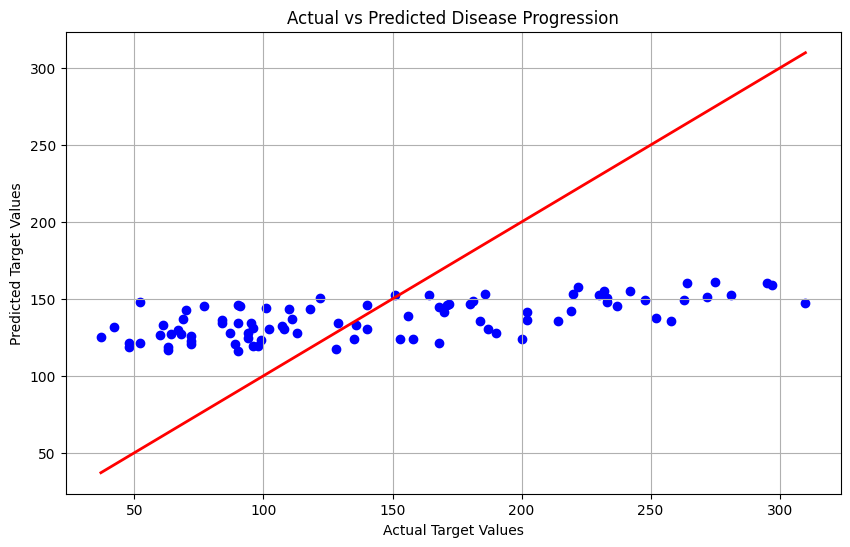

In [5]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs Predicted Disease Progression')
plt.grid(True)
plt.show()

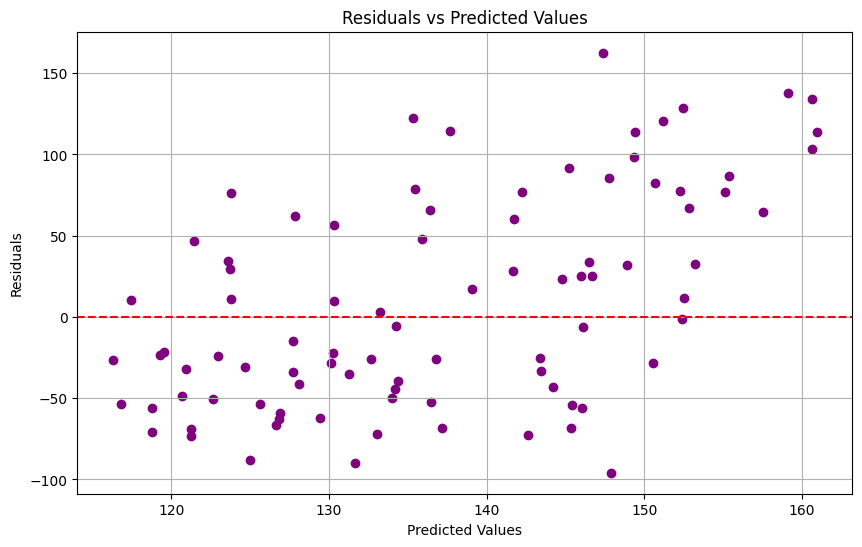

In [8]:
#Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

In [9]:
# Select 10 random examples from the test set
X_sample = X_test.sample(10, random_state=42)
y_sample = y_test[X_sample.index]

# Make predictions on the 10 examples
y_sample_pred = svm_regressor.predict(X_sample)

# Display actual vs predicted values for the 10 examples
for i, (actual, pred) in enumerate(zip(y_sample, y_sample_pred), 1):
    print(f"Example {i}: Actual Target = {actual:.2f}, Predicted Target = {pred:.2f}")

Example 1: Actual Target = 90.00, Predicted Target = 146.02
Example 2: Actual Target = 72.00, Predicted Target = 120.68
Example 3: Actual Target = 140.00, Predicted Target = 146.14
Example 4: Actual Target = 99.00, Predicted Target = 122.96
Example 5: Actual Target = 258.00, Predicted Target = 135.36
Example 6: Actual Target = 219.00, Predicted Target = 142.27
Example 7: Actual Target = 214.00, Predicted Target = 135.48
Example 8: Actual Target = 170.00, Predicted Target = 141.68
Example 9: Actual Target = 94.00, Predicted Target = 124.67
Example 10: Actual Target = 128.00, Predicted Target = 117.48


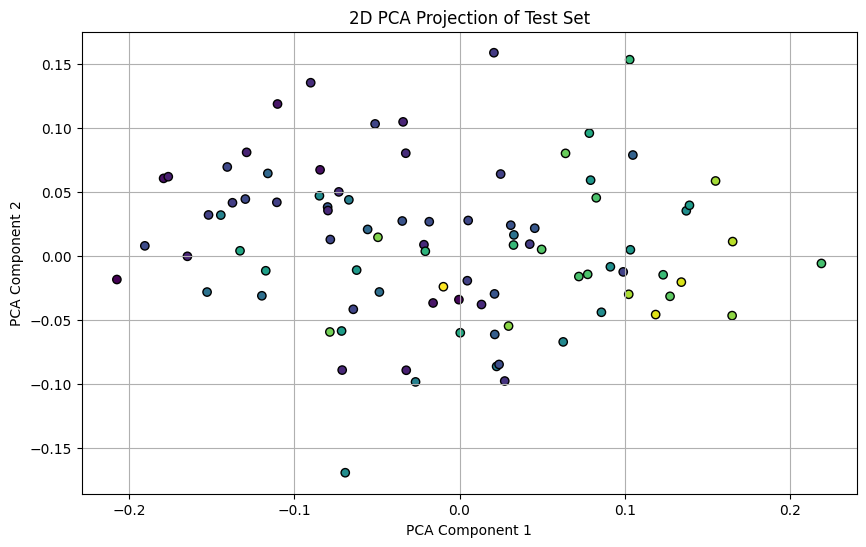

In [10]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Refit SVM regressor using the reduced dimensions
svm_regressor_pca = SVR(kernel='rbf')
svm_regressor_pca.fit(X_train_pca, y_train)

# Plot decision boundary in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolors='k')
plt.title('2D PCA Projection of Test Set')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()